In [1]:
!pip install psycopg2

In [2]:
import psycopg2
import pandas as pd
import pandas.io.sql as psql

In [9]:
conn = psycopg2.connect(
    host = "localhost",
    database = "DS_HW_5",
    user = "postgres",
    password = "postgres"
)

In [10]:
cur  = conn.cursor()
print("PostgreSQL database version:")
cur.execute("Select version()")

db_version = cur.fetchone()
print(db_version)

PostgreSQL database version:
('PostgreSQL 15.3, compiled by Visual C++ build 1914, 64-bit',)


In [30]:
df = psql.read_sql("select * from employeeattrition1 join employeeattrition2 on employeeattrition1.employeenumber = employeeattrition2.employeenumber", conn)
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_15272\2755949244.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = psql.read_sql("select * from employeeattrition1 join employeeattrition2 on employeeattrition1.employeenumber = employeeattrition2.employeenumber", conn)


,employeenumber,age,businesstravel,dailyrate,department,distancefromhome,education,educationfield,environmentsatisfaction,gender,...,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,employeenumber,over18,overtime,attrition
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,0,1,6,4,0,5,1,Y,Yes,Yes
1,2,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,3,3,10,7,1,7,2,Y,No,No
2,4,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,3,0,0,0,0,4,Y,Yes,Yes
3,5,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,8,7,3,0,5,Y,Yes,No
4,7,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,3,2,2,2,2,7,Y,No,No


<Axes: xlabel='educationfield'>

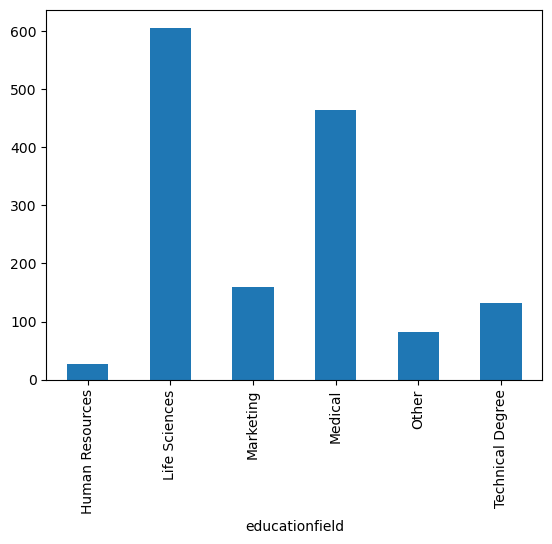

In [36]:
educationField = df.groupby('educationfield')['educationfield']
educationFieldCount = educationField.count()
educationFieldCount.plot(kind = 'bar')

I have created this bar chart to visualize the number of employees in the country according to their education fields. This tells that from which education field does the most employees belong to. 

D:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='department', ylabel='monthlyincome'>

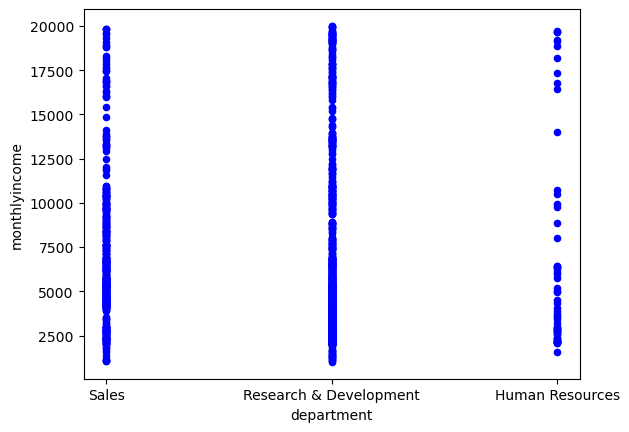

In [37]:
df.plot.scatter(
    x='department', y='monthlyincome', c='blue', cmap='viridis')

I created this scatterplot to find that what is the monthly income range for the different departments in the company. The findings are that the Sales, and R&D Department have salary fairly distributed, but for HR Department only few employees have higher salary while many fall below 110,000.

In [39]:
correlation = df[['monthlyincome', 'totalworkingyears', 'relationshipsatisfaction', 'yearsatcompany']].corr()
correlation

,monthlyincome,totalworkingyears,relationshipsatisfaction,yearsatcompany
monthlyincome,1.000000,0.772893,0.025873,0.514285
totalworkingyears,0.772893,1.000000,0.024054,0.628133
relationshipsatisfaction,0.025873,0.024054,1.000000,0.019367
yearsatcompany,0.514285,0.628133,0.019367,1.000000


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

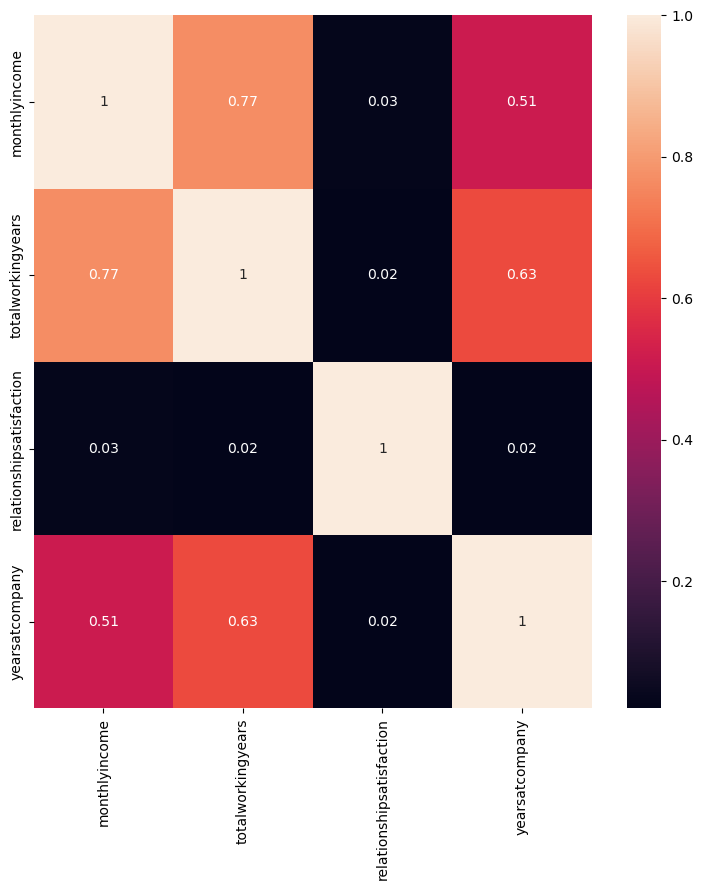

In [41]:
plt.figure(figsize = (9,9))
sns.heatmap(round(correlation,2),annot=True)

I made Correlation plot for monthyincome, totalworkingyears, relationshipsatisfaction, and yearsatcompany. I created this visualization to find out how monthly income is correlated with other factors. We can see that monthlyincome has a positive correlation for most of the factors which means that higher pay does play a role in a employee well being and their loyalness.